# Toma de decisiones de negocios basadas en datos

## Contexto
Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

## Descripción de los datos

### Datos utilizados en la primera parte del proyecto

`'/datasets/hypotheses_us.csv'`:
- `Hypotheses`: breves descripciones de las hipótesis
- `Reach`: alcance del usuario, en una escala del uno a diez
- `Impact`: impacto en los usuarios, en una escala del uno al diez
- `Confidence`: confianza en la hipótesis, en una escala del uno al diez
- `Effort`: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

### Datos utilizados en la segunda parte del proyecto
`'/datasets/orders_us.csv'`:
- `transactionId`: identificador de pedido
- `visitorId`: identificador del usuario que realizó el pedido
- `date`: fecha del pedido
- `revenue`: ingresos del pedido
- `group`: el grupo del test A/B al que pertenece el usuario

`'/datasets/visits_us.csv'`:
- `date`: la fecha
- `group`: grupo del test A/B
- `visits`: el número de visitas en la fecha especificada para el grupo de test A/B especificado

Asegúrate de preprocesar los datos. Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.

## Parte 1. Priorizar hipótesis
El archivo `'hypotheses_us.csv'` contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con `Reach`, `Impact`, `Confidence` y `Effort` especificados para cada una.

El ejercicio consiste en:

- Aplicar el framework `ICE` para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
- Aplicar el framework `RICE` para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
- Mostrar cómo cambia la priorización de hipótesis cuando utilizas `RICE` en lugar de `ICE`. Proporcionar una explicación de los cambios.

## Parte 2. Análisis de test A/B
Realizaste un test A/B y obtuviste los resultados descritos en los archivos `'orders_us.csv'` y `'visitors_us.csv'`.

### Ejercicio
#### Analiza el test A/B

1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

6. Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son:
    1. Para la prueba, considera a uno de los grupos como líder. 
    2. Para la prueba, concluye que no hay diferencia entre los grupos. 
    3. Continúa la prueba.

## Paso 1: Priorizar hipótesis

Se inicia con la carga de los conjuntos de datos, y la exploración inicial de los mismos. Las herramientas a utilizar son:

- Importación de librerías a utilizar.
- Lectura del archivo de datos, y creación de los dataframes.
- Exploración inicial, se utilizan las siguientes herramientas para obtener información acerca del dataset:
    * `'sample()'`: para obetner una muestra aleatoria de los datos.
    * `'info()'`: para obtener una descripción general del dataset.
    * `'dtypes'`: para obterner información acerca del tipo de datos de las columnas del dataset.
    * `'describe()'`: para revisar valores de tipo numérico.

### Importación de librerías

In [1]:
# Se cargan todas la librerías
import pandas as pd
import numpy as np
import math as mt
import datetime as dt
import plotly.express as px
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt

### Lectura del archivo de datos

In [2]:
hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')


### Exploración inicial del dataset

#### Dataset `'hypotheses_us.csv'`

In [3]:
# Se imprime una muestras de los registros del dataset
print("-- Una muestra de los datos del dataset 'hypotheses_us.csv': \n")
print(hypotheses)
print()

# Se lee la infomación general del dataset
print("-- Información general del dataset 'hypotheses_us.csv': \n")
hypotheses.info()
print()

# Se validan los tipos de datos de las columnas
print("-- Tipos de datos del dataset 'hypotheses_us.csv': \n")
print(hypotheses.dtypes)
print()

print("-- Se muestra información general acerca de los datos numéricos del dataset:\n")
print(hypotheses.describe())

-- Una muestra de los datos del dataset 'hypotheses_us.csv': 

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8         

#### Hallazgos dataset `'hypotheses_us.csv'`

La exploración inicial del dataset se arrojó lo siguiente:

- No se encontraron datos ausentes en el dataset.
- Es necesario normalizar los nombres de las columnas del dataset. Se canvertirán todos los carácteres en minúsculas.
- Los tipos de datos para son los correctos.

#### Preparar los datos

En esta parte se realizará la depuración de los datos, se trabajará en lo siguiente:

- Se normalizará el nombre de las columnas del datasets `'hypotheses_us.csv'`.

##### Normalización de los nombres de las columnas

In [4]:
# Se crea una función para realizar el cambio de formato de los nombres de las columnas de los datasets
def format_cols(df):
    """Esta función toma un dataframe como argumento. Para cada uno de los nombres de las columnas del dataframe, normaliza el nombre
    de cada una de ellas; convirtiendo todos los carácteres en minúsculas."""
    new_col_name = []
    for col in df.columns:
        new_col_name.append(col.lower()) 
    df.columns = new_col_name


format_cols(hypotheses)
hypotheses.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes



### Aplicar el framewrok `ICE`
- Se aplicará el framework `ICE` para priorizar las hipótesis y se ordenará el resultado en orden descendente.

In [5]:
# Se aplica el framewotk 'ICE'; se crea una columna llamada 'ICE' en el dataframe 'hypotheses'

hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

print("Se muestra el resultado del 'ICE' para las hipótesis:")
print()
display(hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))


Se muestra el resultado del 'ICE' para las hipótesis:



,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


#### Conclusiones
- Se encuentra que la hipótesis 8 es la más prometedora, seguida por las hipótesis 0 y 7.
- Esto se presenta porque para la hipótesis 8, el impacto y la confianza tiene una gran valoración. Para esta misma hipótesis el alcance es bajo, pero dicho parámetro no es tenido en cuenta en el framework.

### Aplicar el framewrok `RICE`
- Se aplicará el framework `RICE` para priorizar las hipótesis y se ordenará el resultado en orden descendente.

In [6]:
# Se aplica el framewotk 'RICE'; se crea una columna llamada 'RICE' en el dataframe 'hypotheses'

hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

print("Se muestra el resultado del 'RICE' para las hipótesis:")
print()
display(hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))


Se muestra el resultado del 'RICE' para las hipótesis:



,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


#### Conclusiones
- Se encuentra que la hipótesis 7 es la más prometedora, seguida por las hipótesis 2 y 0.
- Al incluir el parámetro del alcance cambia la valoración de la hipótesis, por ello, bajo este framework la hipótesis 7 es la más prometedora.
- Al tener en cuenta el alcance se observa que la hipótesis 8, que bajo el framework `ICE` obtuvo la mejor valoración, bajo el framework `RICE` pierde relevancia y queda ponderada en el quinto lugar.
- Este resultado refleja lo importante que es tener en cuenta la cantidad de usuarios que puede impactar un cambio.
- Para este ejercicio se opta por elegir la hipótesis número 2: *'Add product recommendation blocks to the store's site. This will increase conversion and average purchase size'*, ya que esta puede ser probada o no mediante un test A/B.

## Parte 2. Análisis de test A/B

Se realizó un test A/B para probar la hipótesis: *'Add product recommendation blocks to the store's site. This will increase conversion and average purchase size'* y se obtuvieron los resultados descritos en los archivos `'orders_us.csv'` y `'visitors_us.csv'`.

Se inicia el análisis con la carga de los datasets, y la exploración inicial de los mismos. Las herramientas a utilizar son:

- Importación de librerías a utilizar.
- Lectura del archivo de datos, y creación de los dataframes.
- Exploración inicial, se utilizan las siguientes herramientas para obtener información acerca del dataset:
    * `'sample()'`: para obetner una muestra aleatoria de los datos.
    * `'info()'`: para obtener una descripción general del dataset.
    * `'dtypes'`: para obterner información acerca del tipo de datos de las columnas del dataset.
    * `'describe()'`: para revisar valores de tipo numérico.

In [4]:
orders = pd.read_csv('orders_us.csv')
visits = pd.read_csv('visits_us.csv')



### Exploración inicial del dataset

#### Dataset `'orders_us.csv'`

In [8]:
# Se imprime una muestras de los registros del dataset
print("-- Una muestra de los datos del dataset 'orders_us.csv': \n")
print(orders.head())
print()

# Se lee la infomación general del dataset
print("-- Información general del dataset 'orders_us.csv': \n")
orders.info()
print()

# Se validan los tipos de datos de las columnas
print("-- Tipos de datos del dataset 'orders_us.csv': \n")
print(orders.dtypes)
print()

print("-- Se muestra información general acerca de los datos numéricos del dataset:\n")
print(orders.describe())

-- Una muestra de los datos del dataset 'orders_us.csv': 

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B

-- Información general del dataset 'orders_us.csv': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB

-- Tipos de datos del dataset 'orders_us.csv': 

transactionId      int6

##### Hallazgos dataset `'orders_us.csv'`

La exploración inicial del dataset arrojó lo siguiente:

- No se encontraron datos ausentes en el dataset.
- Es necesario normalizar los nombres de las columnas del dataset. Se canvertirán todos los carácteres en minúsculas.
- Se cambia el tipo de datos para las columnas:
    * `'date'`: se cambia de tipo `'object'` a tipo `'datetime'`.


#### Dataset `'visits_us.csv'`

In [9]:
# Se imprime una muestras de los registros del dataset
print("-- Una muestra de los datos del dataset 'visits_us.csv': \n")
print(visits.head())
print()

# Se lee la infomación general del dataset
print("-- Información general del dataset 'visits_us.csv': \n")
visits.info()
print()

# Se validan los tipos de datos de las columnas
print("-- Tipos de datos del dataset 'visits_us.csv': \n")
print(visits.dtypes)
print()

print("-- Se muestra información general acerca de los datos numéricos del dataset:\n")
print(visits.describe())


-- Una muestra de los datos del dataset 'visits_us.csv': 

         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756

-- Información general del dataset 'visits_us.csv': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

-- Tipos de datos del dataset 'visits_us.csv': 

date      object
group     object
visits     int64
dtype: object

-- Se muestra información general acerca de los datos numéricos del dataset:

           visits
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000


##### Hallazgos dataset `'visits_us.csv'`

La exploración inicial del dataset arrojó lo siguiente:

- No se encontraron datos ausentes en el dataset.
- No es necesario normalizar los nombres de las columnas.
- Se cambia el tipo de datos para las columnas:
    * `'date'`: se cambia de tipo `'object'` a tipo `'datetime'`.

### Valores duplicados

- Se valida si en los datasets existen valores duplicados.

In [10]:
# Se valida si existen filas duplicadas en cada dataset.
duplicated_orders = orders.duplicated().sum()
print(f"-- Total de filas duplicadas en el dataset 'orders_us.csv': {duplicated_orders}")
print()

duplicated_visits = visits.duplicated().sum()
print(f"-- Total de filas duplicadas en el dataset 'visits_us.csv': {duplicated_visits}")
print()

# Se cuenta la cantidad de users ids únicos
print(f"-- Cantidad de users ids únicos: {orders['visitorId'].nunique()}")
print()

# Se cuenta la cantidad de transacciones
print(f"-- Cantidad de transacciones únicas: {orders['transactionId'].nunique()}")
print()


-- Total de filas duplicadas en el dataset 'orders_us.csv': 0

-- Total de filas duplicadas en el dataset 'visits_us.csv': 0

-- Cantidad de users ids únicos: 1031

-- Cantidad de transacciones únicas: 1197



##### Hallazgos

- No se encuentran registros duplicados en los datasets.
- También se validó los valores de la columna `'visitorsId'` y `'transactionsId'` del dataset `'orders'` y no se econtraron valores duplicados.

### Preparar los datos

Se realizará la depuración de los datos. Se trabajará en lo siguiente:

- En el dataset `'orders_us.csv'` se cambiarán los tipos de datos de la columna `'date'` de `object` a `datetime`.
- En el dataset `'visits_us.csv'` se cambiarán los tipos de datos de la columna `'date'` de `object` a `datetime`.
- Se normalizará el nombre de las columnas en el dataset `'orders_us.csv'`.
- Durante las consignas del proyecto se advirtió acerca de la posibilidad de la existencia de errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B. Se validará esta información.


#### Cambiar el tipo de datos

In [11]:
# Se realiza la conversión del tipo de datos de las columnas
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
                                
visits['date'] = pd.to_datetime(visits['date'], format='%Y-%m-%d')

# Se valida que la operación se halla realizado correctamente
print("-- Información general de los datasets 'orders_us.csv' y 'visits_us.csv': \n")
orders.info()
print()
visits.info()
print()

# Se imprime una muestras de los registros del dataset
print("-- Una muestra de los datos de los datasets 'orders_us.csv' y 'visits_us.csv': \n")
print(orders.head())
print()
print(visits.head())

-- Información general de los datasets 'orders_us.csv' y 'visits_us.csv': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory us

#### Normalización de los nombres de las columnas

- Se normaliza el nombre de las columnas del dataset `'orders_us.csv'`.

In [12]:
# Se normaliza el nombre de las columnas
orders.rename(columns={'visitorId': 'visitor_id', 'transactionId': 'transaction_id'}, inplace=True)

# Se valida que la operación se halla realizado correctamente
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


#### Validar la presencia de usuarios en los dos grupos

- Se valida si existen usuarios que están presentes tnato en el grupo `A`, como en el grupo `B`.

In [13]:
# Se cuenta la cantidad de usuarios únicos para cada grupo
visitor_id_a = orders[orders['group'] == 'A']['visitor_id'].nunique()
visitor_id_b = orders[orders['group'] == 'B']['visitor_id'].nunique()

# Se valida el resultado obtenido:
print(f"-- Cantidad de visitantes únicos del grupo A: {visitor_id_a}")
print()
print(f"-- Cantidad de visitantes únicos del grupo B: {visitor_id_b}")
print()

# Se valida la cantidad de usuarios únicos en el dataset 'orders'
print(f"-- Cantidad de visitantes únicos en el dataset 'orders': {orders['visitor_id'].nunique()}")
print()

# Se encuentra la cantidad de usuarios duplicados
print(f"-- Cantidad de visitantes presentes en los dos grupos: {(visitor_id_a + visitor_id_b) - orders['visitor_id'].nunique()}")



-- Cantidad de visitantes únicos del grupo A: 503

-- Cantidad de visitantes únicos del grupo B: 586

-- Cantidad de visitantes únicos en el dataset 'orders': 1031

-- Cantidad de visitantes presentes en los dos grupos: 58


##### Hallazgos

- Se encontró que existen $\bf 58$ visitantes que están presentes en los dos grupos de estudio.

##### Eliminar usuarios presentes en los dos grupos

- Se procede a eliminar a los usuarios presentes en los dos grupos.


In [14]:
# Se encuentran los id de usuarios únicos para cada grupo
visitor_id_a = orders[orders['group'] == 'A']['visitor_id'].drop_duplicates()
visitor_id_b = orders[orders['group'] == 'B']['visitor_id'].drop_duplicates()

# Se encuentran los id de usuarios presentes en los dos grupos
duplicated_id = visitor_id_b[visitor_id_b.isin(visitor_id_a)]

# Se eliminan estos usuarios del dataset 'orders'
orders = orders[~orders['visitor_id'].isin(duplicated_id)]

# Se valida el dataset
orders.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   float64       
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


##### Validar

- Se valida nuevamente que no existan usuarios presentes en los dos grupos.
- Se observa que quedaron $1016$ registros en el dataset `'orders'`, esto corresponde a $181$ registros menos con respecto al dataset original.

In [15]:
# Se cuenta la cantidad de usuarios únicos para cada grupo de los users id par cada grupo
visitor_id_a = orders[orders['group'] == 'A']['visitor_id'].nunique()
visitor_id_b = orders[orders['group'] == 'B']['visitor_id'].nunique()

# Se valida el resultado obtenido:
print(f"-- Cantidad de visitantes únicos del grupo A: {visitor_id_a}")
print()
print(f"-- Cantidad de visitantes únicos del grupo B: {visitor_id_b}")
print()

# Se valida la cantidad de usuarios únicos en el dataset 'orders'
print(f"-- Cantidad de visitantes únicos en el dataset 'orders': {orders['visitor_id'].nunique()}")
print()

# Se encuentra la cantidad de usuarios duplicados
print(f"-- Cantidad de visitantes presentes en los dos grupos: {(visitor_id_a + visitor_id_b) - orders['visitor_id'].nunique()}")


-- Cantidad de visitantes únicos del grupo A: 445

-- Cantidad de visitantes únicos del grupo B: 528

-- Cantidad de visitantes únicos en el dataset 'orders': 973

-- Cantidad de visitantes presentes en los dos grupos: 0


##### Conclusiones

- Se logró indentificar y eliminar $58$ IDs de usuarios que estaban marcados en los dos grupos de estudio.

### Análisis de test A/B

- Este análisis tiene como objerivo probar la siguiente hipótesis:

    *"Add product recommendation blocks to the store's site. This will increase conversion and average purchase size"*

#### Ingresos acumulados por grupos

- Se calcula el ingreso acumulado por cada grupo de estudio, y se grafican los resultados.

In [16]:
# Se crea un dataframe para almacenar los valores únicos de 'date' y 'group' a partir del dataset 'orders'
dates_groups = orders[['date', 'group']].drop_duplicates()

# Se valida el dataframe
print(f"-- Valores únicos de 'date' y 'group':\n{dates_groups.head()}")


-- Valores únicos de 'date' y 'group':
         date group
0  2019-08-15     B
7  2019-08-15     A
45 2019-08-16     A
47 2019-08-16     B
55 2019-08-01     A


In [17]:
# Se crea la variable 'orders_aggregated' para calcular información relacionada con las órdenes, tale como: fecha, grupo, número de
# pedidos, número de usuarios únicos e ingersos totales
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
    {'date': 'max', 'group': 'max', 'transaction_id': pd.Series.nunique, 'visitor_id': pd.Series.nunique, 'revenue': 'sum'}), axis=1).sort_values(by=['date', 'group'])

# Se muestra la información obtenida
print(f"-- Información agregada del dataset 'orders':\n{orders_aggregated.head()}")

-- Información agregada del dataset 'orders':
          date group  transaction_id  visitor_id  revenue
55  2019-08-01     A              23          19   2266.6
66  2019-08-01     B              17          17    967.2
175 2019-08-02     A              42          36   3734.9
173 2019-08-02     B              40          39   3535.3
291 2019-08-03     A              66          60   5550.1


In [18]:
# Se crea la variable 'visitors_aggregated' para obtner información agregada aceraca del número de visitas
visitors_aggregated = dates_groups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({
    'date': 'max', 'group': 'max', 'visits': 'sum'}), axis=1).sort_values(by=['date', 'group'])

# Se muestra la información obtenida
print(f"-- Información agregada del dataset 'visits':\n{visitors_aggregated.head()}")

-- Información agregada del dataset 'visits':
          date group  visits
55  2019-08-01     A     719
66  2019-08-01     B     713
175 2019-08-02     A    1338
173 2019-08-02     B    1294
291 2019-08-03     A    1845


In [19]:
# Se crea la variable 'cumulative_data' y se fusionan las dos tablas obtenidas anteriormente
# Se renombran las columnas para que sean mas descriptivos los nombres
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulative_data.head())

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9      1338
3 2019-08-02     B      40      39   3535.3      1294
4 2019-08-03     A      66      60   5550.1      1845


In [20]:
# Se calcula el ingreso acumulado para cada grupo de estudio
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
print(f"--Ingreso acumulado para el grupo A:\n{cumulative_revenue_a.head()}")
print()

cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]
print(f"--Ingreso acumulado para el grupo B:\n{cumulative_revenue_b.head()}")


--Ingreso acumulado para el grupo A:
        date  revenue  orders
0 2019-08-01   2266.6      23
2 2019-08-02   3734.9      42
4 2019-08-03   5550.1      66
6 2019-08-04   6225.6      77
8 2019-08-05   7623.6      99

--Ingreso acumulado para el grupo B:
        date  revenue  orders
1 2019-08-01    967.2      17
3 2019-08-02   3535.3      40
5 2019-08-03   4606.9      54
7 2019-08-04   6138.5      68
9 2019-08-05   7587.8      89


##### Gráfico de ingresos acumulados diarios para los grupso A y B

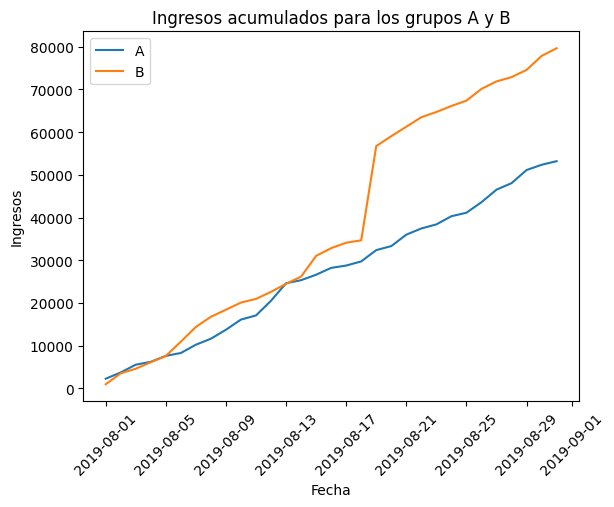

In [21]:
# Se grafica el ingreso acumulado para cada grupo de estudio
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.title('Ingresos acumulados para los grupos A y B')
plt.legend()
plt.xticks(rotation=45)
plt.show()

##### Conclusiones
- Los ingresos son crecientes durante el periodo de prueba par los dos grupos.
- El grupo `B` incrementó mucho más los ingresos aproxiamadamente a mitad de la prueba.
- Es necesario analizar si el incremento en el grupo `B` se debe a la presencia de datos anómalos.

#### Tamaño de pedido promedio

- Se calcula y se grafica el tamaño de pedido promedio acumulado por grupo.

##### Gráfico de tamaño de compra promedio

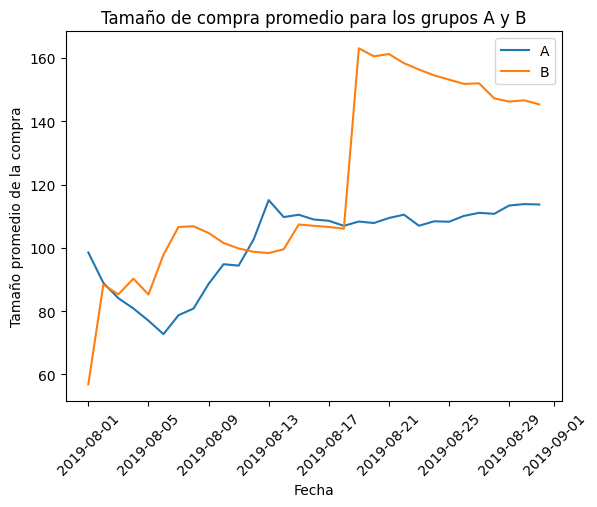

In [22]:
# Con el dataframe de datos agregados se encuentra el tamaño promedio acumulado de cada ordesn
# Se divide el tamaño de la orden entre el número de órdenes, esto se hace para cada grupo.
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio de la compra')
plt.title('Tamaño de compra promedio para los grupos A y B')
plt.legend()
plt.xticks(rotation=45)
plt.show()


##### Conclusiones
- El tamaño promedio de cada compra está fluctuando, esto ocurre para los dos grupos.
- De nuevo se observa que el grupo `B` presenta tamños de compras más grandes, en comparación las órdenes del grupo `A`.
- El tamaño de las órdenes no llega a estabilizarse durante la prueba, algo que es esperado para esta métrica.
- Es necesario validar la presencia de valores atípicos.

#### Diferencia relativa del tamaño de pedido promedio

- Se calcula y se grafica la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo `B` en comparación con el grupo `A`.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-- Ingresos acumulados para los grupos 'A' y 'B':
        date  revenue_a  orders_a  revenue_b  orders_b
0 2019-08-01     2266.6        23      967.2        17
1 2019-08-02     3734.9        42     3535.3        40
2 2019-08-03     5550.1        66     4606.9        54
3 2019-08-04     6225.6        77     6138.5        68
4 2019-08-05     7623.6        99     7587.8        89


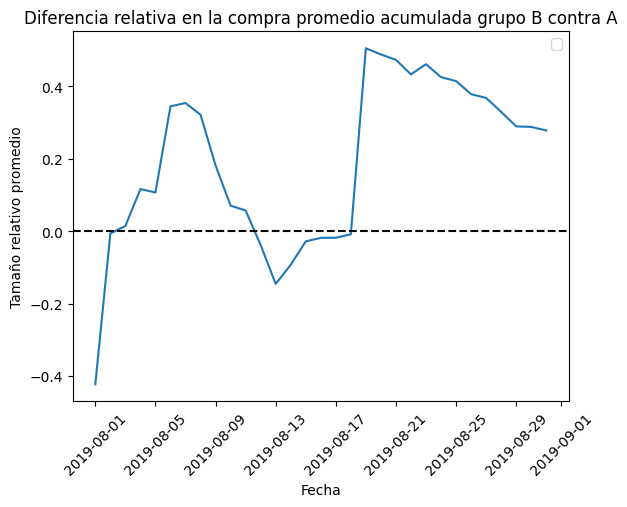

In [23]:
# Se fusionan los dataframe 'cumulative_revenue_a' y 'cumulative_revenue_b
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

# Se muestra el dataset obtenido
print(f"-- Ingresos acumulados para los grupos 'A' y 'B':\n{merged_cumulative_revenue.head()}")

# Se grafica la diferencia relativa entre los tamaños de pedidos para los dos grupos
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])/(
    merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Tamaño relativo promedio')
plt.title('Diferencia relativa en la compra promedio acumulada grupo B contra A')
plt.legend()
plt.xticks(rotation=45)
plt.show()

##### Conclusiones
- De nuevo se observan diferencias importantes entre los grupos.
- Se nota que al inicio de la prueba el grupo `A` toma la delantera, luego el grupo `B` pasa a liderar.
- Finalmente después de un periodo de tiempo, los tamaños de las compras del grupo `B` son mas grandes que las del grupo `A`.
- Es necesario validar la existencia de valores atípicos, y si estos inciden en el crecimiento del grupo `B`.

#### Tasa de conversión

- Se calcula y se grafica la tasa de conversión para los dos grupos, como la relación entre los pedidos y el número de visitantes diario.


-- Una muestra del dataset 'cumulative_data':
        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9      1338
3 2019-08-02     B      40      39   3535.3      1294
4 2019-08-03     A      66      60   5550.1      1845

-- Una muestra del dataset 'cumulative_data':
        date group  orders  visitors  conversion
0 2019-08-01     A      23       719    0.031989
1 2019-08-01     B      17       713    0.023843
2 2019-08-02     A      42      1338    0.031390
3 2019-08-02     B      40      1294    0.030912
4 2019-08-03     A      66      1845    0.035772


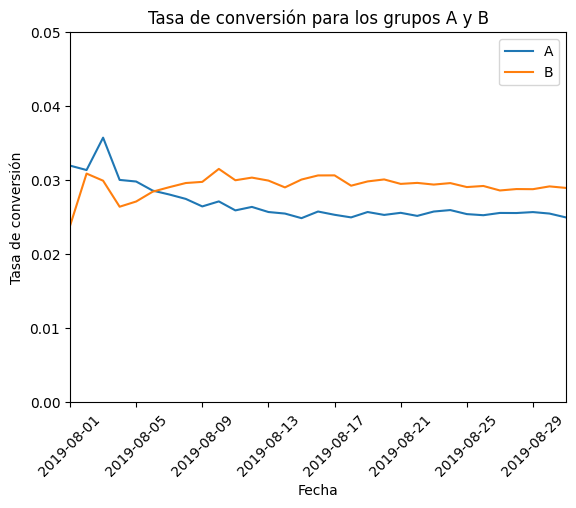

In [24]:
# Del dataset 'cumulative_data' tenemos el número de visitantes diarios por grupos, y el revenue del día, con esta información
# se puede calcular la tasa de conversión
print(f"-- Una muestra del dataset 'cumulative_data':\n{cumulative_data.head()}")
print()

# Se calcula la tase de conversión como: 'orders'/'visitors'
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

# Se valida que la operacióñ se halla realizado correctamente
print(f"-- Una muestra del dataset 'cumulative_data':\n{cumulative_data[['date', 'group', 'orders', 'visitors', 'conversion']].head()}")

# Se filtra la tasa de conversión para cada grupo
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

# Se grafica la tasa de conversión  para cada grupo
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0, 0.05])
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión')
plt.title('Tasa de conversión para los grupos A y B')
plt.xticks(rotation=45)
plt.show()

##### Tasa de conversión de diferencia relativa

- Se grafica la diferencia relativa entre la tasa de conversión acumulada del grupo `B` con respecto al grupo `A`.


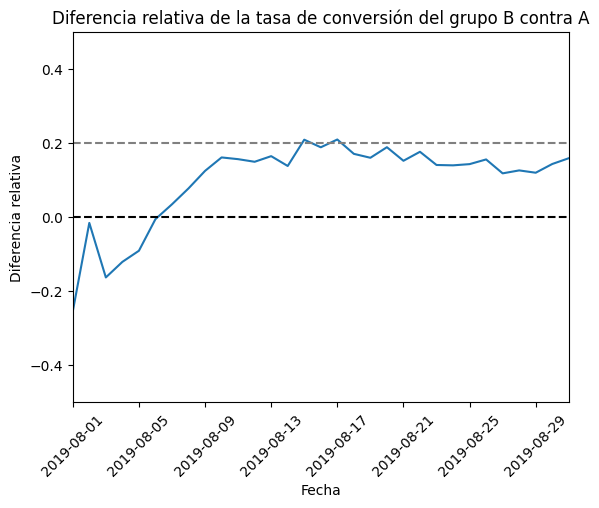

In [25]:
# Se fusiona la información de la tasa de conversión de cada grupo
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']],
                                                                        left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

# Se calcula la diferencia relativa entre las tasas de conversión y se traza el gráfico
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversion_b']/merged_cumulative_conversions['conversion_a']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.5, 0.5])
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.title('Diferencia relativa de la tasa de conversión del grupo B contra A')
plt.xticks(rotation=45)
plt.show()


##### Conclusiones

- Al inicio de la prueba el grupo `A` presenta una mejor tasa de conversión con respecto al grupo `B`.
- Luego de un tiempo la tasa de conversión del grupo `A` comienza a descender pero logra estabilizarse; mientras que la tasa de conversión del grupo `B` va aumentando, y logra estabilizarse con el paso del tiempo.
- El gráfico de conversión nos muestra que no hay mucha diferencia entre la tasa de conversión al inicio de la prueba con respecto al final de la prueba, para los dos grupos.
- El gráfico de la diferencia relativa en las tasas de conversión, nos muestra que después de un tiempo la tasa de conversión del grupo `B` es mejor que la tasa de conversión del grupo `A`, hasta en un $20\,\%$.

#### Gráficos de dispersión

- Se realiza un gráfico de dispersión del número de pedidos por usuario.

-- Número de órdenes por usuario ordenado:
   visitor_id  transaction_id
0     5114589               1
1     6958315               1
2    11685486               1
3    39475350               1
4    47206413               1

-- Número de órdenes por usuario:
        user_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3



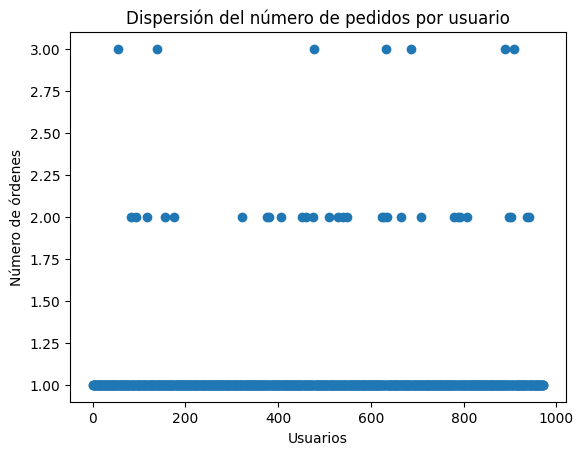

In [26]:
# Se calcula el número de órdenes por usuario agrupando por usuario y encontrando el número de órdenes únicas con el método 'pd.Series.nunique'
# con el método 'drop' se eliminan las columnas inncesarias
orders_by_users = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
# Se muestra el dataframe obtenido
print(f"-- Número de órdenes por usuario ordenado:\n{orders_by_users.head()}")
print()

# Se renombra las columnas para una mejor descripción de la información del dataset
orders_by_users.columns = ['user_id', 'orders']

# Se muestra el dataframe y se ordena por el valor de las columna 'orders'
print(f"-- Número de órdenes por usuario:\n{orders_by_users.sort_values(by='orders', ascending=False).head()}")
print()

# Con la ayuda del método 'plt.scatter' se crea un gráfico de dispersión para el número de pedidos por usuario
orders_values = pd.Series(range(0, len(orders_by_users['orders'])))
plt.scatter(orders_values, orders_by_users['orders'])
plt.xlabel('Usuarios')
plt.ylabel('Número de órdenes')
plt.title('Dispersión del número de pedidos por usuario')
plt.show()

##### Conclusiones

- Se observa que la gran mayoría de los usuarios realiza $1$ pedido.
- Y muy pocos usuarios realizan más de dos pedidos.
- Es necesario calcular los percentiles para conocer el porcentaje exacto, y poder considerar si existen anomalías o no.

#### Cálculo de percentiles del número de pedidos por usuarios.

- Se calculan los percentiles $95$ y $99$ para el número de pedidos por usuario. Y también se define el punto en el cual un punto de datos se convierte en un dato atípico.

In [27]:
# Con la ayuda del método 'np.percentile' se calculan los percentiles 95 y 99 para el número de órdenes por usuario
percentil_95 = np.percentile(orders_by_users['orders'], [95])
percentil_99 = np.percentile(orders_by_users['orders'], [99])

print(f"-- El percentil 95 para el número de órdenes por usuario es: {percentil_95[0]}")
print()
print(f"-- El percentil 99 para el número de órdenes por usuario es: {percentil_99[0]}")

-- El percentil 95 para el número de órdenes por usuario es: 1.0

-- El percentil 99 para el número de órdenes por usuario es: 2.0


##### Conclusiones

- No más del $5\,\%$ de los usuarios realizó mas de un pedido.
- No más del $1\,\%$ de los usuarios realizó mas de dos pedido.
- *Se define en $\bf 1$ el número de pedidos por usuario como el punto límite de pedidos para que no sea considerado como dato atípico.*

#### Gráfico de dispersión del precio de los pedidos

- Se analiza la dispersión de los precios de los pedidos.

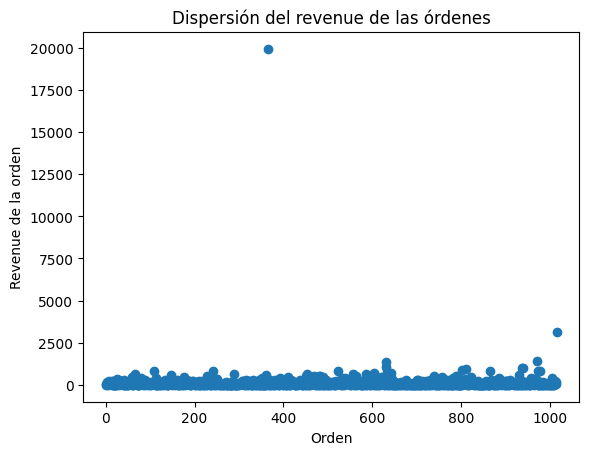

In [28]:
# Se obtiene el valor de los pedidos del dataset 'orders'
orders_revenue = pd.Series(range(0, len(orders['revenue'])))

# Se traza el gráfico de dispersión
plt.scatter(orders_revenue, orders['revenue'])
plt.xlabel('Orden')
plt.ylabel('Revenue de la orden')
plt.title('Dispersión del revenue de las órdenes')
plt.show()


##### Conclusiones

- Se encuentra que la mayoría de las órdenes son de menos de $\$ 2,500\,usd$.
- Existen algunas órdenes de gran tamaño.
- Hay que determinar en qué porcentajes se encuentran las órdenes grandes.

#### Cálculo de percentiles del número de pedidos por usuarios.

- Se calculan los percentiles $95$ y $99$ de los precios de los pedidos, para definir el punto en el cual un punto de datos se convierte en un dato atípico.

In [29]:
# Con la ayuda del método 'np.percentile' se calculan los percentiles 95 y 99 para el precio de los pedidos
percentil_95 = np.percentile(orders['revenue'], [95])
percentil_99 = np.percentile(orders['revenue'], [99])

print(f"-- El percentil 95 para el precio de los pedidos es: {percentil_95[0]}")
print()
print(f"-- El percentil 99 para el precio de los pedidos es: {percentil_99[0]}")

-- El percentil 95 para el precio de los pedidos es: 414.275

-- El percentil 99 para el precio de los pedidos es: 830.3


##### Conclusiones

- Se encuentra que sólo el $5\,\%$ de los pedidos es mayor a $\$414.275\,usd$.
- Sólo el $1\,\%$ de los pedido está por encima de los $\$830.3\,usd$.
- *Se define en $\$414\,usd$ el precio del pedido como el punto límite del precio de la órden para que no sea considerada como dato atípico.*


#### Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto.

- Se analiza la significancia estadística en la diferencia entre la tasa de conversión entre los grupos `A` y `B`, para este análisis se utilizan los datos en bruto.

In [30]:
# Se obtienen los usuarios que realizaron al menos una órden, y se calcula el número de órdenes realizadas.
# Esto se obtiene para cada grupo de estudio
orders_by_users_a = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_by_users_b.columns = ['user_id', 'orders']

# Se muestra en pantalla las variables
print(f"-- Número de órdenes por usuario para el grupo A:\n{orders_by_users_a.sort_values(by='orders', ascending=False).head()}")
print()
print(f"-- Número de órdenes por usuario para el grupo B:\n{orders_by_users_b.sort_values(by='orders', ascending=False).head()}")

-- Número de órdenes por usuario para el grupo A:
        user_id  orders
58    611059232       3
211  2108163459       3
310  2988190573       3
409  3908431265       3
416  3967698036       3

-- Número de órdenes por usuario para el grupo B:
        user_id  orders
347  2742574263       3
33    249864742       3
486  3935952912       2
256  2025197455       2
418  3332057097       2


Para  aplicar la prueba *Mann-Whitney*, se necesitan dos muestras con usuarios de los diferentes grupos y el número de pedidos. Los que no pidieron nada tendrán un $0$.

In [31]:
sample_a = pd.concat([orders_by_users_a['orders'], pd.Series(0, index=np.arange(
    visits[visits['group'] == 'A']['visits'].sum() - len(orders_by_users_a['orders'])), name='orders')], axis=0)

sample_b = pd.concat([orders_by_users_b['orders'], pd.Series(0, index=np.arange(
    visits[visits['group'] == 'B']['visits'].sum() - len(orders_by_users_b['orders'])), name='orders')], axis=0)

# Se define el valor alpha y se aplica la prueba 'mann-whitney', se imprime el 'p-value' y el resultado de la prueba.
alpha = 0.05
result = st.mannwhitneyu(sample_a, sample_b)
print('p-value:', result.pvalue.round(3))
print()

if (result.pvalue < alpha):
    print("La hipótesis nula se rechaza, la diferencia es estadísticamente significativa.")
else:
    print("No se puede rehzar la hipótesis nula, no hay una difirencia estadísticamente significativa.")
print()

print('Conversión relativa para el grupo B:','{0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))



p-value: 0.011

La hipótesis nula se rechaza, la diferencia es estadísticamente significativa.

Conversión relativa para el grupo B: 0.160


##### Conclusiones

- Se encuentra una diferencia estadísticamente significativa entre las tasas de conversión de los dos grupos. 
- La perdida relativa del grupo `A` es de alrededor del $16\,\%$.
- Es necesario determinar si los valores atípicos inciden en este resultado.

#### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.

- Se analiza la significancia estadística de la diferencia en el tamaño promedio de la compra entre los grupos `A` y `B`, para este análisis se utilizan los datos en bruto.

In [32]:
# Se aplica la prueba para Mann-Whitney a los datos del revenue para cada grupo de  estudio
# Se define el valor alpha y se aplica la prueba 'mann-whitney', se imprime el 'p-value' y el resultado de la prueba.
alpha = 0.05
result_revenue = st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])

print('p-value:', result_revenue.pvalue.round(3))
print()

if (result_revenue.pvalue < alpha):
    print("La hipótesis nula se rechaza, la diferencia es estadísticamente significativa.")
else:
    print("No se puede rechazar la hipótesis nula, no hay una difirencia estadísticamente significativa.")
print()

print('Revenue relativo para el grupo B:','{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1))


p-value: 0.862

No se puede rechazar la hipótesis nula, no hay una difirencia estadísticamente significativa.

Revenue relativo para el grupo B: 0.278


##### Conclusiones

- Como el `p-value` es mayor que $0.05$ no se encuentra una diferencia estadísticamente significativa entre el tamaño promedio de las compras entre los dos grupos. 
- Sin embargo la difrencia relativa del tamaño promedio de las compras en mayor para el grupo `B` es en un $27.8\,\%$.
- Es necesario determinar si los valores atípicos inciden en este resultado.

#### Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados

- Ahora se va a calcular la signifincancia estadística de la diferencia en la conversión entre los grupos `A` y `B`. Pero esta vez vamos a filtrar los datos que se consideran atípicos.
- En pasos anteriores se determinó que no se tendrían en cuenta los siguientes datos:

    - Se considera $\bf 1$ el número de pedidos por usuario como el punto límite de pedidos.
    - Se considera $\$414\,usd$ el precio del pedido como el punto límite del precio de la órden.

- Con estos límites se deja por fuera el $5\,\%$ de los usuarios con la mayor cantidad de pedidos, y entre el $1\,\% - 5\,\%$ de los usuarios con los pedidos mas costosos.

##### Filtrado de datos anómalos

In [33]:
# Se encuentran los usuarios con la mayor cantidad de pedidos, y los usuarios con los pedidos mas caros
users_with_many_orders = pd.concat([orders_by_users_a[orders_by_users_a['orders'] > 1]['user_id'], 
                                   orders_by_users_b[orders_by_users_b['orders'] > 1]['user_id']], axis = 0)

users_with_expensive_orders = orders[orders['revenue'] > 414]['visitor_id']

# Se fusionan los dos dataset obtenidos anteriormente, asi tendremos en un solo lugar todos los usuarios que se consideran 
# atípicos
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis = 0).drop_duplicates().sort_values()

# Se valida el resultado obtenido
print(f"-- Listado de usuarios con mayor cantidad de pedidos, y con pedidos mas caros:\n{abnormal_users.head()}")
print()
print(f"-- Número de usuarios con mayor cantidad de pedidos, y con pedidos mas caros: {len(abnormal_users)}")

# Se eliminan de la muestra los usuarios considerados anómalos, y se divide las muestra entre los dos grupos de estudio
sample_a_filtered = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(orders_by_users_a['orders'])),name='orders')],axis=0)

sample_b_filtered = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(orders_by_users_b['orders'])),name='orders')],axis=0)



-- Listado de usuarios con mayor cantidad de pedidos, y con pedidos mas caros:
568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64

-- Número de usuarios con mayor cantidad de pedidos, y con pedidos mas caros: 86


##### Cálculo de significancia estadística

In [34]:
# Se calcula la significancia estadística en la difrencia de las tasas de conversión entre los grupos 'A' y 'B'
# con los datos atípicos filtrados
# Se define el valor alpha y se aplica la prueba 'mann-whitney', se imprime el 'p-value' y el resultado de la prueba.
alpha = 0.05
result_filtered = st.mannwhitneyu(sample_a_filtered, sample_b_filtered)
print('p-value:', result_filtered.pvalue.round(3))
print()

if (result_filtered.pvalue < alpha):
    print("La hipótesis nula se rechaza, la diferencia es estadísticamente significativa.")
else:
    print("No se puede rechazar la hipótesis nula, no hay una difirencia estadísticamente significativa.")
print()

print('Conversión relativa para el grupo B:','{0:.3f}'.format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1))

p-value: 0.016

La hipótesis nula se rechaza, la diferencia es estadísticamente significativa.

Conversión relativa para el grupo B: 0.174


##### Conclusiones

- Se encuentra una diferencia estadísticamente significativa entre las tasas de conversión de los dos grupos, aún cuando se eliminaron los datos atípicos.
- La perdida relativa del grupo `A` es de alrededor del $17\,\%$. Esta pérdida relativa aumentó, con respecto a la tasa de conversión calcula con los datos en bruto.
- La tasa de conversión es mayor en el grupo `B`.

#### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados.

- Se analiza la significancia estadística en el tamaño promedio de los pedidos entre los dos grupos, pero ahora no se tienen en cuenta los usuarios atípicos.

##### Filtrado de datos atípicos
- Ya se cuenta con el dataset filtrado, se trabaja con el dataframe `'abnormal_users'`

In [35]:
# Se crean las muestras para cada grupo de estudio
filtered_order_a = orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']

filtered_order_b = orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']

##### Cálculo de la significancia estadística

In [36]:
# Se calcula la significancia estadística del tamaño promedio de los pedidos entre los grupos 'A' y 'B'
# Se define el valor alpha y se aplica la prueba 'mann-whitney', se imprime el 'p-value' y el resultado de la prueba.
alpha = 0.05
result_filtered_revenue = st.mannwhitneyu(filtered_order_a, filtered_order_b)
print('p-value:', result_filtered_revenue.pvalue.round(3))
print()

if (result_filtered_revenue.pvalue < alpha):
    print("La hipótesis nula se rechaza, la diferencia es estadísticamente significativa.")
else:
    print("No se puede rechazar la hipótesis nula, no hay una difirencia estadísticamente significativa.")
print()

print('Tamaño promedio del pedido relativo para el grupo B:','{0:.3f}'.format(filtered_order_b.mean() / filtered_order_a.mean() - 1))

p-value: 0.771

No se puede rechazar la hipótesis nula, no hay una difirencia estadísticamente significativa.

Tamaño promedio del pedido relativo para el grupo B: -0.033


##### Conslusiones

- Aunque el `p-value` disminuyó se mantiene el resultado, no hay una diferencia estadísticamente significativa entre los dos grupos.
- Ahora se observa una diferencia relativa en el tamaño promedio de los pedidos, se encuentra que el tamaño promedio de los pedidos del grupo `B` es menor en un $3.3\,\%$ y no mayor en un $27.8\,\%$, como se encontró en el análisis con los datos en bruto.
- Esto muestra como afectan los análisis los datos atípicos.

### Conclusiones generales

- En términos de tasa de conversión se econtró una diferencia estadísticamente significativa entre los grupos. Tanto como los datos en bruto, como con los datos sin valores atípicos, de hecho la tasa de conversión del grupo `B` mejora si no se consideran los valores atípicos.
- El tamaño promedio de la compra no muestra una diferencia estadísticamente significativa entre los grupos. 
- Si se comparan las diferencias relativas en el tamaño promedio de los pedidos, y sin considerar los valores atípicos, se encuentra que el tamaño promedio relativo del grupo `B` es menor en compración con el grupo `A` en un $3.3\,\%$.

## Decisión con respecto a la prueba

- La prueba tiene un éxito parcial. Si bien la prueba muestra que es posible aumentar la tasa de conversión, esto no se ve reflejado en el aumento del tamaño promedio de los pedidos.
- Se recomienda:
    1. Finalizar la prueba. 
    2. Continuar con los análisis para descurbrir, el por qué no se está mejorando el tamaño promedio de los pedidos.